<h3> Importing required libraries </h3>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from datetime import datetime
from scipy.stats.stats import pearsonr

<b> Change working directory </b>

In [2]:
os.chdir('/Users/Shared/Files From c.localized/Aviroop/USC/Courses/DSO 599')

<b> Read file (Data obtained from https://data.medicare.gov/Hospital-Compare/Medicare-Hospital-Spending-by-Claim/nrth-mfg3) </b>

In [3]:
HealthData = pd.read_csv('Medicare_Hospital_Spending_by_Claim.csv')

<b> View pandas dataframe </b>

In [4]:

HealthData.head()

,Hospital_Name,Provider_ID,State,Period,Claim_Type,Avg_Spending_Per_Episode_Hospital,Avg_Spending_Per_Episode_State,Avg_Spending_Per_Episode_Nation,Percent_of_Spending_Hospital,Percent_of_Spending_State,Percent_of_Spending_Nation,Start_Date,End_Date
0,ST. VINCENT'S EAST,10011,AL,During Index Hospital Admission,Durable Medical Equipment,14,23,20,0.07%,0.12%,0.10%,1012016,12312016
1,ST. VINCENT'S EAST,10011,AL,1 through 30 days After Discharge from Index H...,Carrier,1086,1017,1059,5.53%,5.32%,5.22%,1012016,12312016
2,DEKALB REGIONAL MEDICAL CENTER,10012,AL,1 through 30 days After Discharge from Index H...,Home Health Agency,634,849,697,4.19%,4.44%,3.43%,1012016,12312016
3,DEKALB REGIONAL MEDICAL CENTER,10012,AL,1 through 30 days After Discharge from Index H...,Outpatient,401,573,697,2.66%,3%,3.43%,1012016,12312016
4,SHELBY BAPTIST MEDICAL CENTER,10016,AL,During Index Hospital Admission,Inpatient,9169,9213,9676,45.85%,48.14%,47.66%,1012016,12312016


<b> Pairwise Correlation between variables (Pearson Correlation) </b>

In [5]:
HealthData.corr(method = 'pearson')

,Provider_ID,Avg_Spending_Per_Episode_Hospital,Avg_Spending_Per_Episode_State,Avg_Spending_Per_Episode_Nation,Start_Date,End_Date
Provider_ID,1.000000e+00,0.002232,0.001893,-1.793512e-17,NaN,NaN
Avg_Spending_Per_Episode_Hospital,2.232327e-03,1.000000,0.977526,9.753386e-01,NaN,NaN
Avg_Spending_Per_Episode_State,1.893353e-03,0.977526,1.000000,9.984320e-01,NaN,NaN
Avg_Spending_Per_Episode_Nation,-1.793512e-17,0.975339,0.998432,1.000000e+00,NaN,NaN
Start_Date,NaN,NaN,NaN,NaN,NaN,NaN
End_Date,NaN,NaN,NaN,NaN,NaN,NaN


<b> Linear correlation between:
    1. 'Avg_Spending_Per_Episode_Hospital' and 'Avg_Spending_Per_Episode_State
    2. 'Avg_Spending_Per_Episode_Nation' and 'Avg_Spending_Per_Episode_State'
    3. 'Avg_Spending_Per_Episode_Hospital' and 'Avg_Spending_Per_Episode_Nation'
 
So, 
</b>
<i> But, what is Avg_Spending_Per_"Episode"? Does it indicate the amount of money spent on any medical illness treatment? Let's have a look at the dataset again. </i>
    

In [6]:
HealthData.head()

,Hospital_Name,Provider_ID,State,Period,Claim_Type,Avg_Spending_Per_Episode_Hospital,Avg_Spending_Per_Episode_State,Avg_Spending_Per_Episode_Nation,Percent_of_Spending_Hospital,Percent_of_Spending_State,Percent_of_Spending_Nation,Start_Date,End_Date
0,ST. VINCENT'S EAST,10011,AL,During Index Hospital Admission,Durable Medical Equipment,14,23,20,0.07%,0.12%,0.10%,1012016,12312016
1,ST. VINCENT'S EAST,10011,AL,1 through 30 days After Discharge from Index H...,Carrier,1086,1017,1059,5.53%,5.32%,5.22%,1012016,12312016
2,DEKALB REGIONAL MEDICAL CENTER,10012,AL,1 through 30 days After Discharge from Index H...,Home Health Agency,634,849,697,4.19%,4.44%,3.43%,1012016,12312016
3,DEKALB REGIONAL MEDICAL CENTER,10012,AL,1 through 30 days After Discharge from Index H...,Outpatient,401,573,697,2.66%,3%,3.43%,1012016,12312016
4,SHELBY BAPTIST MEDICAL CENTER,10016,AL,During Index Hospital Admission,Inpatient,9169,9213,9676,45.85%,48.14%,47.66%,1012016,12312016


<b> What does Period indicate? The duration spent in the hospital/after discharge/prior to admission/ Complete illness duration. Let's output the distinct values in the "Period" column. </b>

In [7]:
HealthData['Period'].unique()

array(['During Index Hospital Admission',
       '1 through 30 days After Discharge from Index Hospital Admission',
       '1 to 3 days Prior to Index Hospital Admission',
       'Complete Episode'], dtype=object)

<b>Now, from what the phrases indicates, we can claim that the spending on "Complete Episodes" will be the most. Let's have a look. </b>

<b> Since all the average spending is correlated to each other, using any one of them should be suffice. </b>

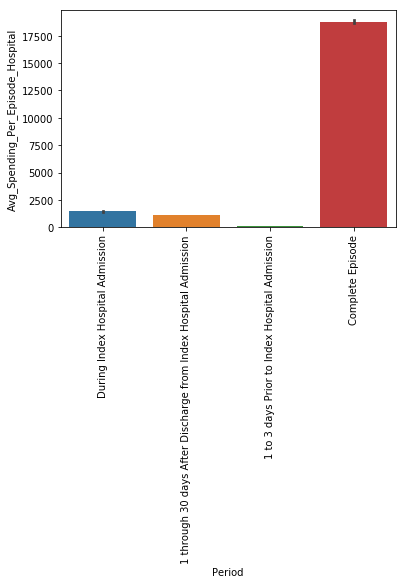

In [33]:
AvgSpendingPeriodGraph = sns.barplot(x = HealthData['Period'], y = HealthData['Avg_Spending_Per_Episode_Hospital'])
for element in AvgSpendingPeriodGraph.get_xticklabels():
    element.set_rotation(90)

<b> And we notice that highest Healthcare spending is in a complete Episode, while "1 to 3 days prior to index Hospital Admission", the average healthcare spending is the least.  
 <br>   Let's have a look at which STATE spends the most. </br>
</b>


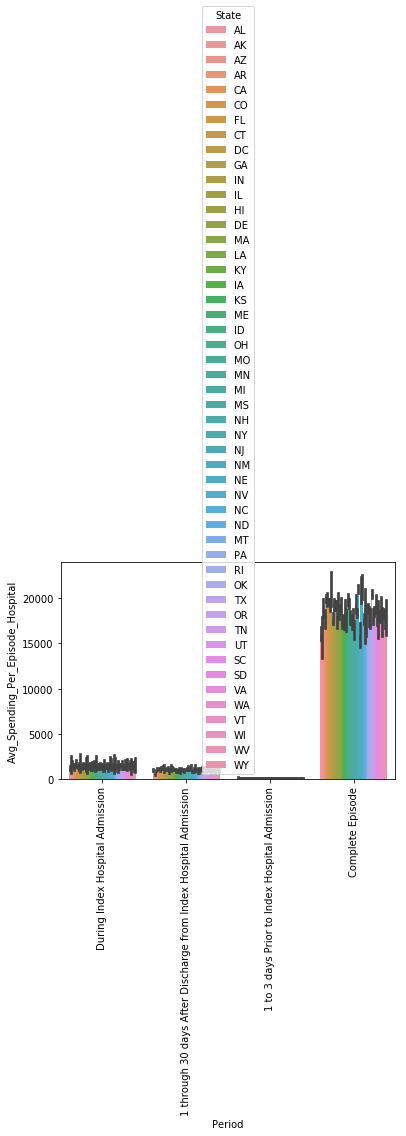

In [32]:
AvgSpendingPeriodGraph = sns.barplot(x = HealthData['Period'], y = HealthData['Avg_Spending_Per_Episode_Hospital'], hue = HealthData['State'])
for element in AvgSpendingPeriodGraph.get_xticklabels():
    element.set_rotation(90)
    

<b> This graph isn't quite intuitive Let's have a look at only healthcare spending grouped by states. </b>

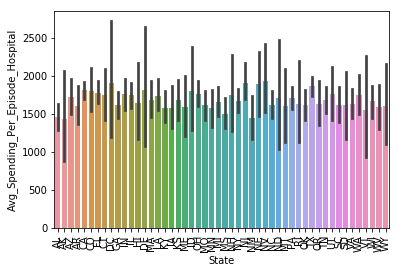

In [35]:
AvgSpendingvsStateGraph = sns.barplot(x = HealthData['State'], y = HealthData['Avg_Spending_Per_Episode_Hospital'])
for element in AvgSpendingvsStateGraph.get_xticklabels():
    element.set_rotation(90)

<b> Quite difficult to interpret the graph. Let's calculate sum of healthcare spending group by state, and find out which state is spending the most. </b>

In [61]:
SpendingPerState = HealthData.groupby('State')['Avg_Spending_Per_Episode_Hospital'].sum().sort_values(ascending = False)

In [62]:
SpendingPerState.head()

State
TX    11735769
CA    11572030
FL     6489946
PA     5548351
NY     5329534
Name: Avg_Spending_Per_Episode_Hospital, dtype: int64

<b> Top 5 states spending the most on Healthcare: TX, CA, FL, PA, NY. Let's take only these states in our visualization. </b>

In [74]:
SeriesIndices = SpendingPerState.head().index[:]
TopStatesSpendingList = SeriesIndices.tolist()

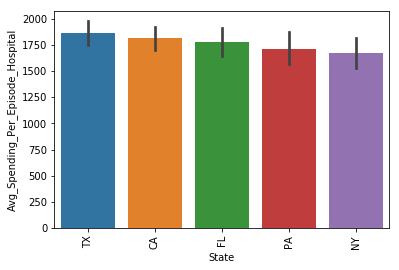

In [79]:
AvgSpendingvsStateGraph = sns.barplot(x = HealthData['State'], y = HealthData['Avg_Spending_Per_Episode_Hospital'], order = TopStatesSpendingList)
for element in AvgSpendingvsStateGraph.get_xticklabels():
    element.set_rotation(90)

<b> Highest Medicare hospital spending states: Texas, California, Florida, Pensylvania, New York.</b>